# Libraries

In [2]:
%%capture

!pip install numpy
!pip install pybamm
!pip install scikit-learn
!pip install fastsim

# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import os
import math
#import fastsim
#import pybamm

## EDA

In [3]:
path = "US06_HS_TEST"

# Lista todos os arquivos .txt
txt_list = glob.glob(os.path.join(path, "*.txt"))

dfs = []

In [4]:
for txt in txt_list:
    # Extrai TEST ID
    test_id = int(os.path.basename(txt).split()[0])
    
    # Lê o arquivo .txt
    df = pd.read_csv(txt, sep="\t")
    
    # Adiciona coluna "Test_id"
    df["Test_id"] = test_id
    
    dfs.append(df)

In [5]:
# Concatena tudo
df = pd.concat(dfs, ignore_index=True)

In [6]:
# Coloca "Test_id" como a primeira coluna e ordena para começar no primeiro "Test_id"
columns = ["Test_id"] + [col for col in df.columns if col != "Test_id"]
df = df[columns]

df = df.sort_values(by="Test_id").reset_index(drop=True)

In [7]:
df.head(5)

,Test_id,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_RH[%],Test_Cell_Temp[C],Phase_#,Engine_Oil_Temp[C],Engine_Coolant_Temp[C],Engine_Speed[rpm],HV_Battery_Current[A],HV_Battery_Voltage[V],Fuel_Flow_FuelScale[cc/s]
0,61302062,-9.4,-0.000,-2.825,52.523,20.934,0.0,79.285,81.0,0.0,0.078,21.081,0.0
1,61302062,-9.3,0.001,-2.825,52.523,20.933,0.0,79.297,81.0,0.0,0.079,21.069,0.0
2,61302062,-9.2,-0.000,-2.890,52.523,20.934,0.0,79.286,81.0,0.0,0.078,21.058,0.0
3,61302062,-9.1,-0.000,-2.911,52.522,20.933,0.0,79.309,81.0,0.0,0.080,21.043,0.0
4,61302062,-9.0,-0.001,-2.868,52.523,20.934,0.0,79.291,81.0,0.0,0.080,21.029,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39003 entries, 0 to 39002
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Test_id                    39003 non-null  int64  
 1   Time[sec]                  39003 non-null  float64
 2   Dyno_Speed[mph]            39003 non-null  float64
 3   Dyno_Tractive_Effort[N]    39003 non-null  float64
 4   Test_Cell_RH[%]            39003 non-null  float64
 5   Test_Cell_Temp[C]          39003 non-null  float64
 6   Phase_#                    39003 non-null  float64
 7   Engine_Oil_Temp[C]         39003 non-null  float64
 8   Engine_Coolant_Temp[C]     39003 non-null  float64
 9   Engine_Speed[rpm]          39003 non-null  float64
 10  HV_Battery_Current[A]      39003 non-null  float64
 11  HV_Battery_Voltage[V]      39003 non-null  float64
 12  Fuel_Flow_FuelScale[cc/s]  39003 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 3.9 MB


In [9]:
df.isnull().sum()

Test_id                      0
Time[sec]                    0
Dyno_Speed[mph]              0
Dyno_Tractive_Effort[N]      0
Test_Cell_RH[%]              0
Test_Cell_Temp[C]            0
Phase_#                      0
Engine_Oil_Temp[C]           0
Engine_Coolant_Temp[C]       0
Engine_Speed[rpm]            0
HV_Battery_Current[A]        0
HV_Battery_Voltage[V]        0
Fuel_Flow_FuelScale[cc/s]    0
dtype: int64

In [10]:
print("Total de valores nulos:", df.isnull().sum().sum())

Total de valores nulos: 0


In [11]:
df.shape

(39003, 13)

In [12]:
df["Test_id"].value_counts().sort_index()

Test_id
61302062    13001
61302076    13001
61302100    13001
Name: count, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_id,39003.0,6.130208e+07,15.691671,6.130206e+07,6.130206e+07,6.130208e+07,6.130210e+07,6.130210e+07
Time[sec],39003.0,6.400000e+02,375.311353,-1.000000e+01,3.150000e+02,6.400000e+02,9.650000e+02,1.290000e+03
Dyno_Speed[mph],39003.0,4.447739e+01,26.794436,-2.760000e-01,1.933450e+01,5.642600e+01,6.605900e+01,8.084700e+01
Dyno_Tractive_Effort[N],39003.0,2.316474e+02,1673.747126,-5.843537e+03,-3.365000e+00,2.394990e+02,6.769960e+02,6.669397e+03
Test_Cell_RH[%],39003.0,2.652630e+01,9.043282,1.319600e+01,1.907800e+01,2.567400e+01,3.184800e+01,5.286600e+01
Test_Cell_Temp[C],39003.0,1.993829e+01,18.040343,-7.845000e+00,-2.119000e+00,2.564600e+01,3.778700e+01,4.065200e+01
Phase_#,39003.0,2.408276e+00,1.276587,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
Engine_Oil_Temp[C],39003.0,9.074915e+01,6.095508,0.000000e+00,8.703200e+01,9.058100e+01,9.544300e+01,1.005130e+02
Engine_Coolant_Temp[C],39003.0,8.566115e+01,3.049291,7.600000e+01,8.300000e+01,8.600000e+01,8.800000e+01,9.300000e+01
Engine_Speed[rpm],39003.0,1.615951e+03,845.098568,0.000000e+00,1.321250e+03,1.637000e+03,1.829500e+03,6.003000e+03


#### Outliers

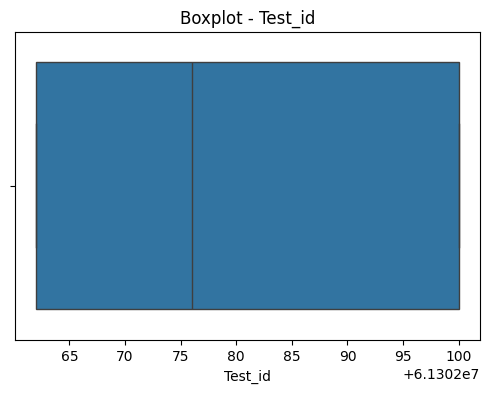

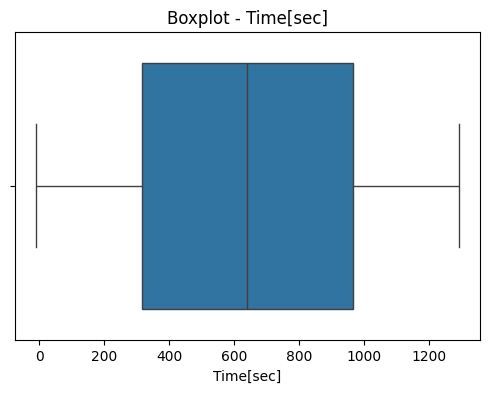

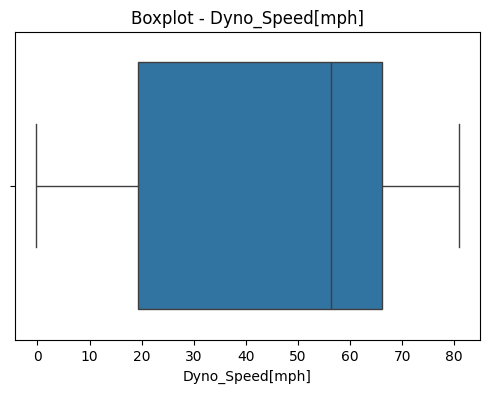

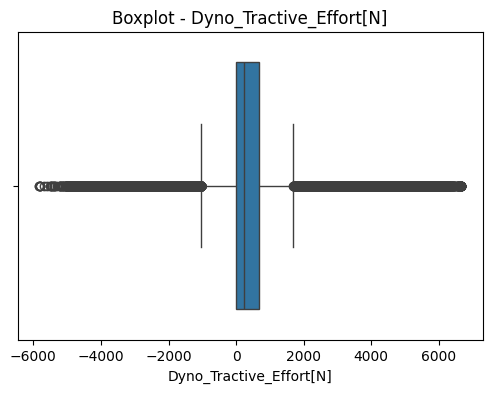

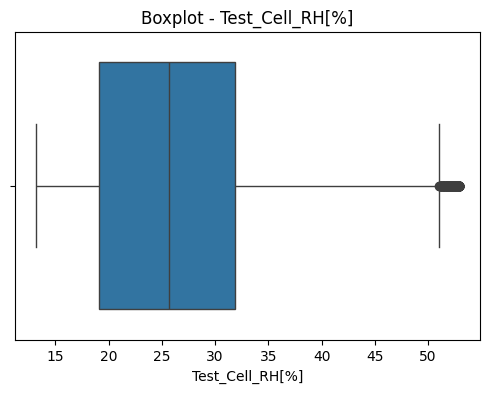

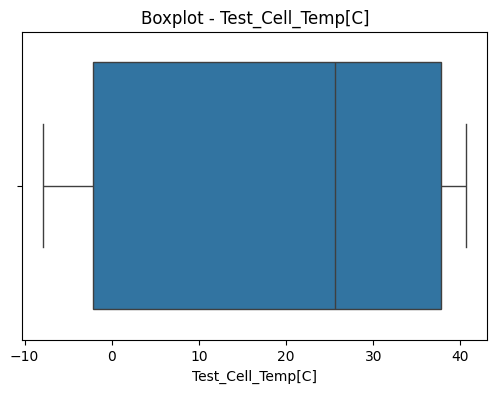

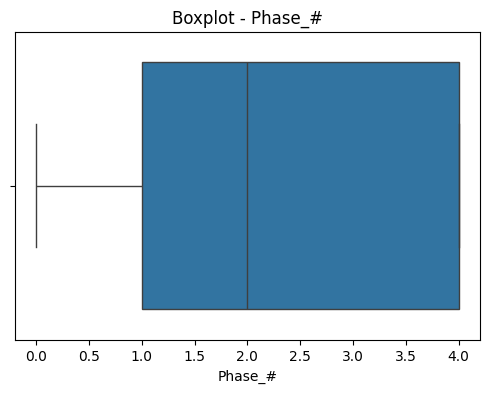

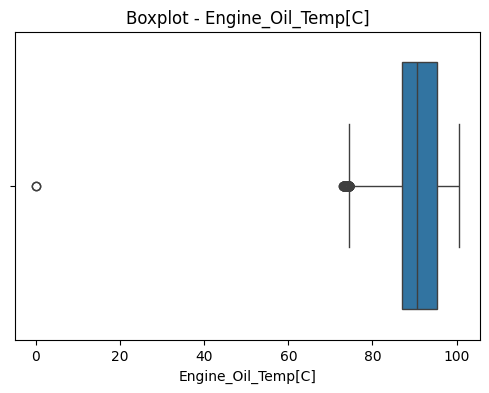

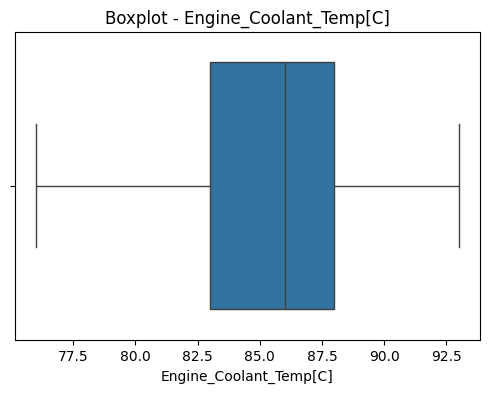

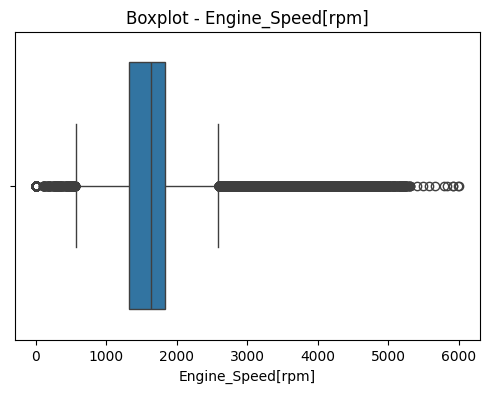

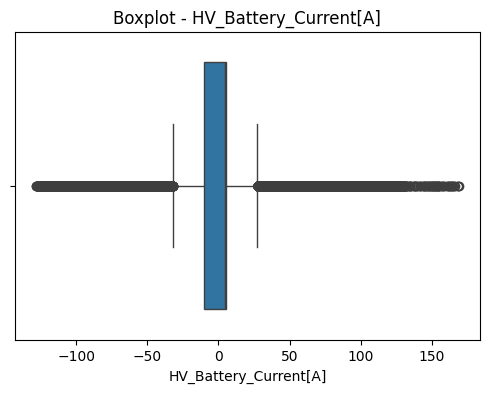

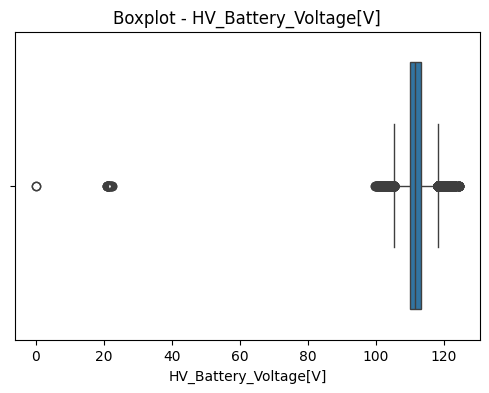

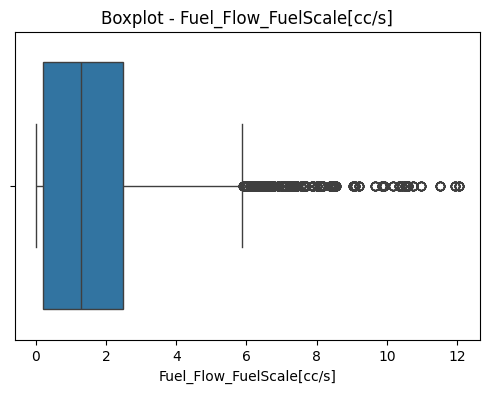

In [14]:
# Gera um boxplot para cada  coluna
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


In [15]:
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    if not outliers.empty:
        print(f"Coluna {col} tem {len(outliers)} outliers")


Coluna Dyno_Tractive_Effort[N] tem 9249 outliers
Coluna Test_Cell_RH[%] tem 928 outliers
Coluna Engine_Oil_Temp[C] tem 338 outliers
Coluna Engine_Speed[rpm] tem 8034 outliers
Coluna HV_Battery_Current[A] tem 9419 outliers
Coluna HV_Battery_Voltage[V] tem 3211 outliers
Coluna Fuel_Flow_FuelScale[cc/s] tem 1192 outliers


#### Correlação

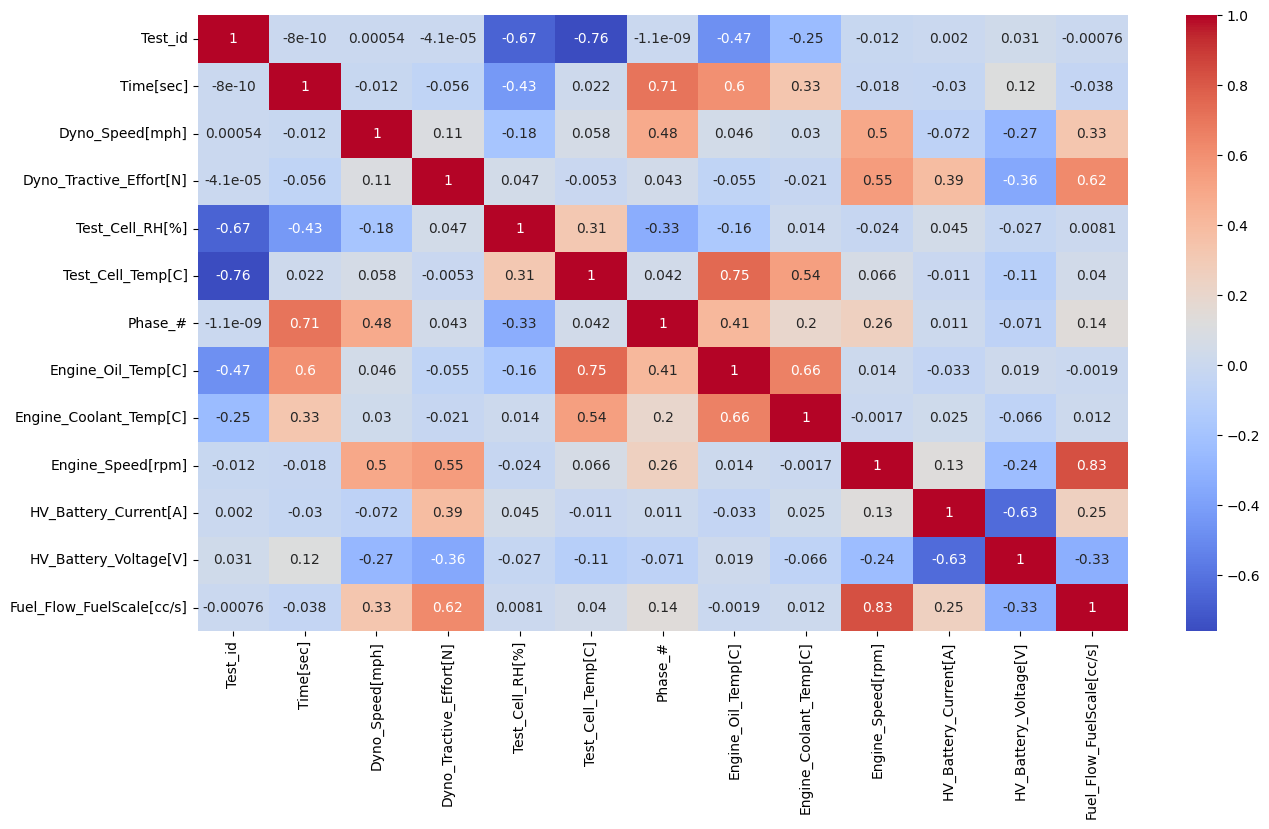

In [16]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
